# The Basics: Training The First Model

# Import dependencies
First, import TensorFlow. Here, we're calling it tf for ease of use. 

Next, import NumPy as np. Numpy helps us to represent our data as highly performant lists.

In [0]:
import tensorflow as tf
import numpy as np

# Set up training data
To create a model that can give the temperature in Fahrenhet when given the degrees in Celsius, we create two lists celsius_q and fahrenheit_a that we can use to train our model.
to convert from Celsius to Fahrenheit, where the approximate formula is:

>`F=C×1.8+32`

In [3]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenhet".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenhet
-10.0 degrees Celsius = 14.0 degrees Fahrenhet
0.0 degrees Celsius = 32.0 degrees Fahrenhet
8.0 degrees Celsius = 46.0 degrees Fahrenhet
15.0 degrees Celsius = 59.0 degrees Fahrenhet
22.0 degrees Celsius = 72.0 degrees Fahrenhet
38.0 degrees Celsius = 100.0 degrees Fahrenhet


# Create the model
Next create the model. We will use simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

## Build a layer
Keras layers are the fundamental building block of keras models. 
We'll call the layer l0 and create it by instantiating tf.keras.layers.Dense with the following configuration:
**Dense layer**- Just  like regular densely-connected NN layer.

**input_shape**=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celcius.

**units**=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the later would need to match the input_shape of the next layer.)

>![alt text](https://qph.fs.quoracdn.net/main-qimg-d438091abeecdfaa049b5a046bd7f4b7)

In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

## Assemble layers into the model
Machine learning models are homogeneous to functions that will predict some output for a particular given input. Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [0]:
model = tf.keras.Sequential([l0])

**Note**

You will often see the layers defined inside the model definition, rather than beforehand:

>model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Compile the model, with loss and optimizer functions
Before training, the model has to be compiled. When compiled for training, the model is given:

**Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss").

**Optimizer function **— A way of adjusting internal values in order to reduce the loss.

In [0]:
model.compile(loss = "mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (model.fit(), below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

The loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) and the optimizer ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

Some advantages of Adam include:

*   Relatively low memory requirements (though higher than gradient descent and gradient descent with momentum)
*   Usually works well even with little tuning of hyperparameters.

One part of the Optimizer you may need to think about when building your own models is the learnign rate (0.1 in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

# Train the model
Train the model by calling the fit method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are intially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the fit method. The first argument is the inputs, the second argument is the desired outputs. The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces.


*   Epochs - It is a measure of the number of times all of the training vectors are used once to update the weights.
*   Verbose - will just mention the number of epoch like this: 
  
  ![alt text](https://i.stack.imgur.com/s43II.png)
  
  ![alt text](https://i.stack.imgur.com/gxbMD.png)
  



In [11]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


# Display training statistics
The fit method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in fahrenheit_a.

We'll use Matplotlib to visualize this. As we can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.

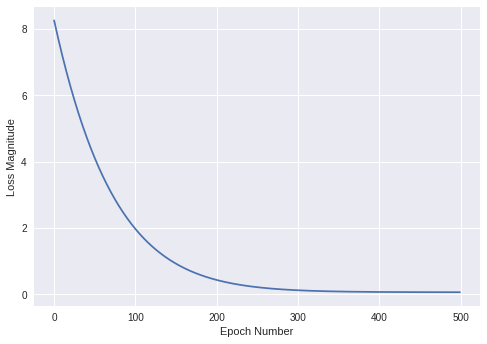

In [12]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use the model to predict values
Now you have a model that has been trained to learn the relationshop between celsius_q and fahrenheit_a. We can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees.
So, for example, if the Celsius value is 100, what the Fahrenheit result will be? 

In [13]:
print(model.predict([100.1]))

[[211.92294]]


The correct answer is  100×1.8+32=212 , so our model is doing really well.

### To review

*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epochs)

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)







## Looking at the layer weights
Finally, let's print the internal variables of the Dense layer.

In [14]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.7982017]], dtype=float32), array([31.92296], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as the equation for a line,  **𝑦=𝑚𝑥+𝑏** , which has the same form as the conversion equation    

> F=1.8*C+32.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.

### A little experiment
Just for fun, what if we created more Dense layers with different units, which therefore also has more variables?

In [21]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0,l1,l2])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.1]))
print("These are the layer variables l0: {}".format(l0.get_weights()))
print("These are the layer variables l1: {}".format(l1.get_weights()))
print("These are the layer variables l2: {}".format(l2.get_weights()))

Finished training the model
[[211.92722]]
These are the layer variables l0: [array([[ 0.39655232,  0.03820269, -0.5708938 , -0.15478069]],
      dtype=float32), array([ 3.282667 , -1.3668424, -3.3018568,  2.8341215], dtype=float32)]
These are the layer variables l1: [array([[ 0.22638088,  0.8466238 ,  0.9748409 , -0.5792423 ],
       [ 0.6749271 ,  0.40884373, -0.68841195, -0.12399245],
       [-0.48555604, -0.82874346, -0.52104485,  0.4719266 ],
       [ 0.42637601, -0.04397179,  0.57036215, -0.49415302]],
      dtype=float32), array([ 3.1750004,  3.3453674,  3.2879949, -2.9612942], dtype=float32)]
These are the layer variables l2: [array([[ 0.578743  ],
       [ 0.61045784],
       [ 1.1952169 ],
       [-0.9845124 ]], dtype=float32), array([3.1985102], dtype=float32)]


As ywe can see, this model is also able to predict the corresponding Fahrenheit value really well. But when we look at the variables (weights) in the l0 and l1 layers, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.